In [88]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [89]:
data_set = pd.read_csv("abalone.data.csv", names = ['Sex','Length','Diameter','Height','Whole Weight','Shucked Weight',
                                                    'Viscera Weight','Shell Weight','Rings'])

In [90]:
data_set.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


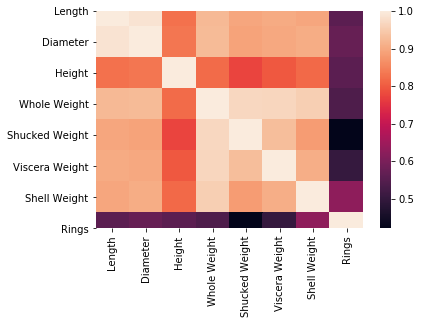

In [91]:
sns.heatmap(data_set.corr())

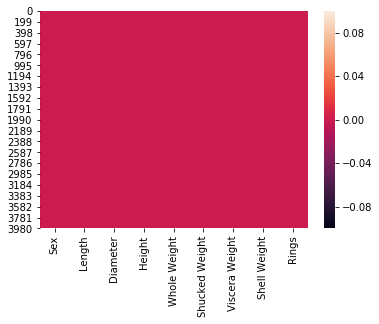

In [92]:
sns.heatmap(data_set.isnull())

In [93]:
data_set.corr()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked Weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera Weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


# ANOVA for categorical_predictor and continuous_target variables

In [94]:
data_set.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Rings'],
      dtype='object')

In [95]:
label_encoder = LabelEncoder()
data_set['Sex_cat'] = label_encoder.fit_transform(data_set['Sex'])

In [96]:
table = pd.crosstab(data_set['Sex_cat'], data_set['Rings'])
table

Rings,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,29
Sex_cat,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,4,16,44,122,238,248,...,15,12,7,3,6,1,1,0,1,1
1,1,1,12,51,100,216,267,274,173,92,...,2,2,1,0,0,0,0,0,0,0
2,0,0,3,6,11,27,80,172,278,294,...,15,12,6,3,3,1,0,1,1,0


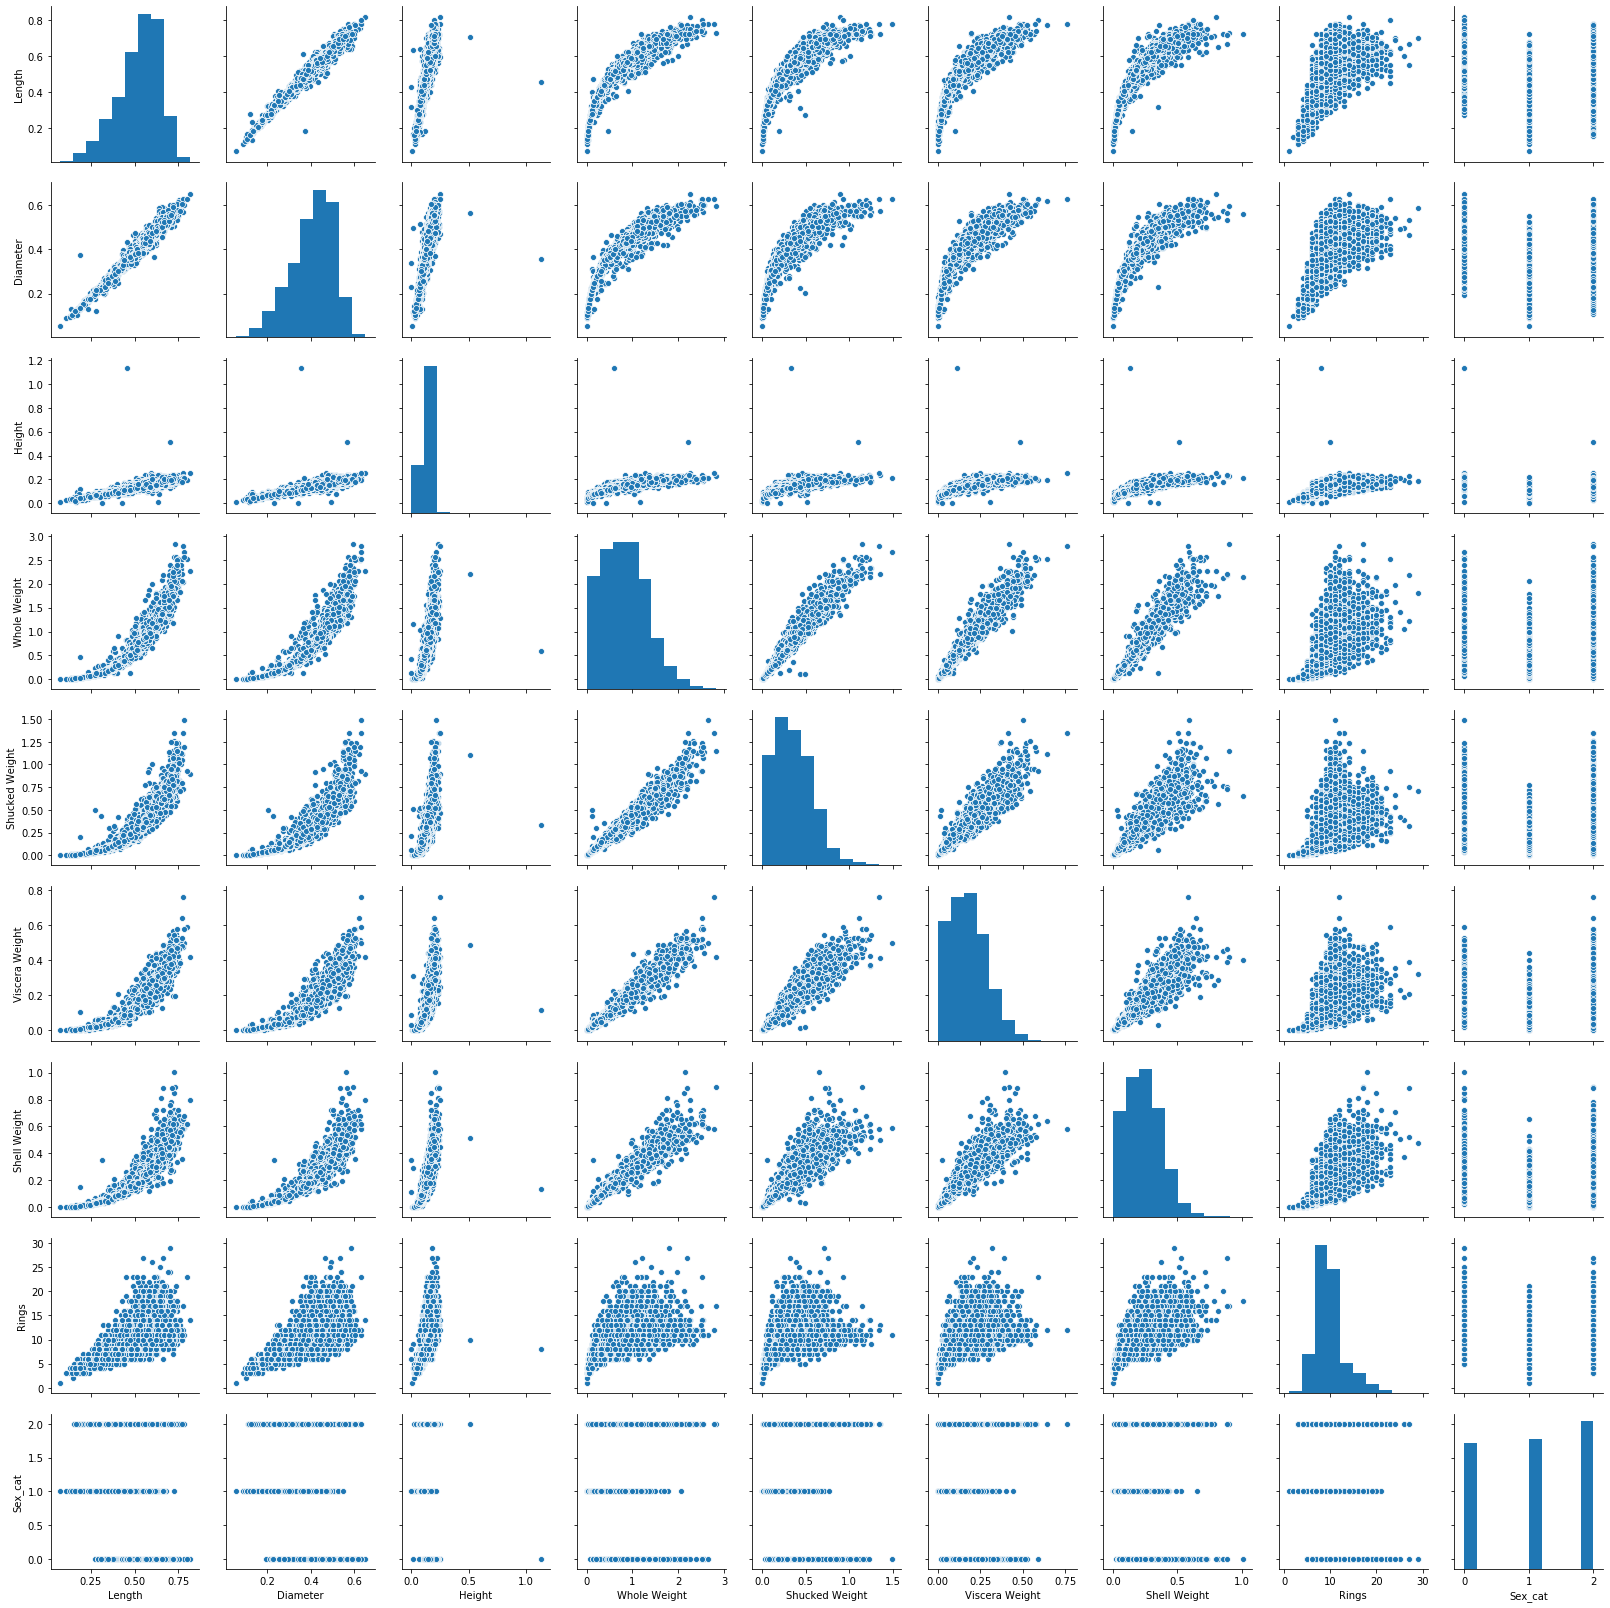

In [97]:
sns.pairplot(data_set)

In [98]:
data_set.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Rings', 'Sex_cat'],
      dtype='object')

In [99]:
feature_variables = ['Length',  'Whole Weight', 'Shucked Weight',
        'Sex_cat']
#,, 'Diameter''Height','Viscera Weight', 'Shell Weight'
target_variables = ['Rings']

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [101]:
X = data_set[feature_variables]
y = data_set[target_variables]

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[3.14382203]
[[ 10.90997485  12.07647386 -25.09977549   0.07720989]]


In [104]:
y_pred = regressor.predict(X_test)

In [105]:
y_pred.flatten()

array([13.41370506,  9.56408585, 11.99685748,  5.73974905, 11.67199058,
       12.2337728 ,  7.66618276,  9.76582013,  8.37722768, 12.93536588,
        9.18132644,  6.69333043,  8.14904415,  9.19740513,  5.87536881,
        8.94978921,  7.66351476, 13.54009765, 10.85603376,  8.39866849,
        7.73121596,  7.63002044,  9.26298476,  7.50474465, 10.35832253,
       11.55246359,  5.05322532, 13.32164379, 11.41846289, 11.30764564,
        7.80861277,  4.99575612, 11.62605115, 13.92562613,  7.66582516,
        8.24699945,  8.78588441,  9.03840674,  8.29394449, 10.69675441,
       11.80556959,  9.25108054, 10.85794796, 11.81842141, 12.27977131,
        9.40089891,  8.86437854, 11.72393614, 10.82161315,  8.274748  ,
       10.92858113,  7.91909814,  8.93775916, 12.64672774,  8.72227807,
        8.2185924 ,  6.25576039,  7.29098351,  7.89758106,  7.57301502,
       10.65390337,  9.20457498, 11.54286259,  8.13972226,  8.49016783,
       11.57510227, 11.9335495 , 12.02487962,  9.02563972, 13.50

In [106]:
y_test 

,Rings
668,13
1580,8
3784,11
463,5
2615,12
...,...
575,11
3231,12
1084,7
290,17


In [107]:
df = pd.DataFrame({'Actual': y_test['Rings'], 'Predicted': y_pred.flatten()})

In [108]:
df

,Actual,Predicted
668,13,13.413705
1580,8,9.564086
3784,11,11.996857
463,5,5.739749
2615,12,11.671991
...,...,...
575,11,10.241420
3231,12,8.328206
1084,7,8.811036
290,17,11.592032


In [109]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.687163070734615
Mean Squared Error: 5.56932224168312
Root Mean Squared Error: 2.3599411521652653
